In [1]:
import cv2 as cv2
import os
import matplotlib.pyplot as plt
from PIL import Image
import easyocr
import pyocr
import numpy as np
from PIL import ImageFont, ImageDraw, Image
import sys
import re
from tqdm import tqdm
import layoutparser as lp

In [3]:
model = lp.Detectron2LayoutModel('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config', 
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

/Users/satoshan/.pyenv/versions/miniforge3-4.10.3-10/envs/org_chart/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
config.yml?dl=1: 8.19kB [00:02, 3.67kB/s]
model_final.pth?dl=1: 330MB [01:36, 3.42MB/s]                               
/Users/satoshan/.pyenv/versions/miniforge3-4.10.3-10/envs/org_chart/lib/python3.11/site-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the fu

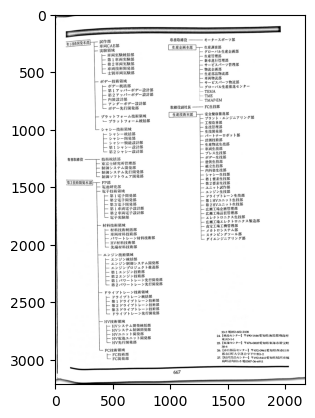

In [18]:

path = "/Users/satoshan/Library/CloudStorage/Box-Box/scan_org_charts/"
path_2010 = path + "2010"
files = os.listdir(path_2010)
files = [f for f in files if os.path.isfile(os.path.join(path_2010, f))]
files.sort()
file = os.path.join(path_2010, files[25])
img = cv2.imread(file)
plt.imshow(img)
plt.show()

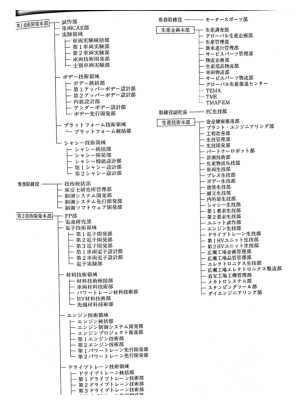

In [19]:
layout = model.detect(img)
lp.draw_box(img, layout, box_width=3)
figures = [block for block in layout if block.type == "Figure"]

# 各Figureの領域を画像から切り出し
for i, figure in enumerate(figures):
    x_1, y_1, x_2, y_2 = map(int, figure.coordinates)  # 座標を取得
    cropped_img = img[y_1:y_2, x_1:x_2]  # 画像を切り出し
    
    # 切り出したFigureを表示
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))  # BGRからRGBに変換
    plt.axis("off")
    plt.show()